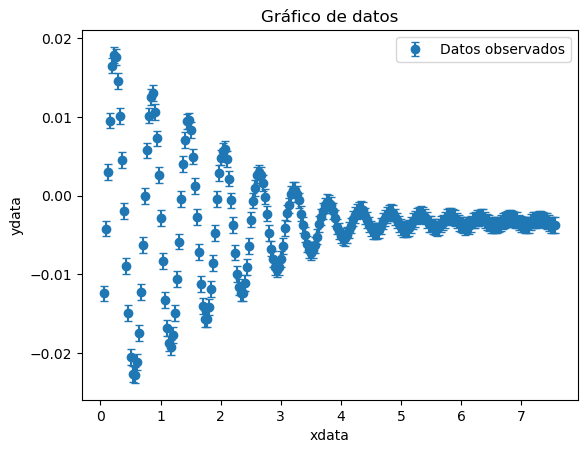

100%|█████████████████████████████████████| 10000/10000 [04:47<00:00, 34.78it/s]


Parámetro 1: 2.71e-02 +4.14e-04 -4.08e-04
Parámetro 2: 5.64e-01 +1.10e-02 -1.09e-02
Parámetro 3: 1.06e+01 +1.30e-02 -1.31e-02
Parámetro 4: -7.45e+00 +1.54e-02 -1.54e-02
Parámetro 5: -3.61e-03 +6.66e-05 -6.62e-05
[0.02710455356148179, 0.5640679757176217, 10.553164321169879, -7.452806865655797, -0.0036125217018587873]
Los valores han sido guardados en el archivo 'parametrosx.txt'.


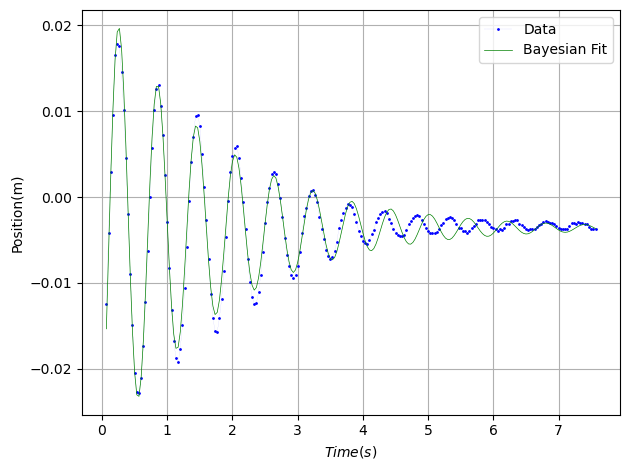

[ 2.71045536e-02  5.64067976e-01  1.05531643e+01 -7.45280687e+00
 -3.61252170e-03]


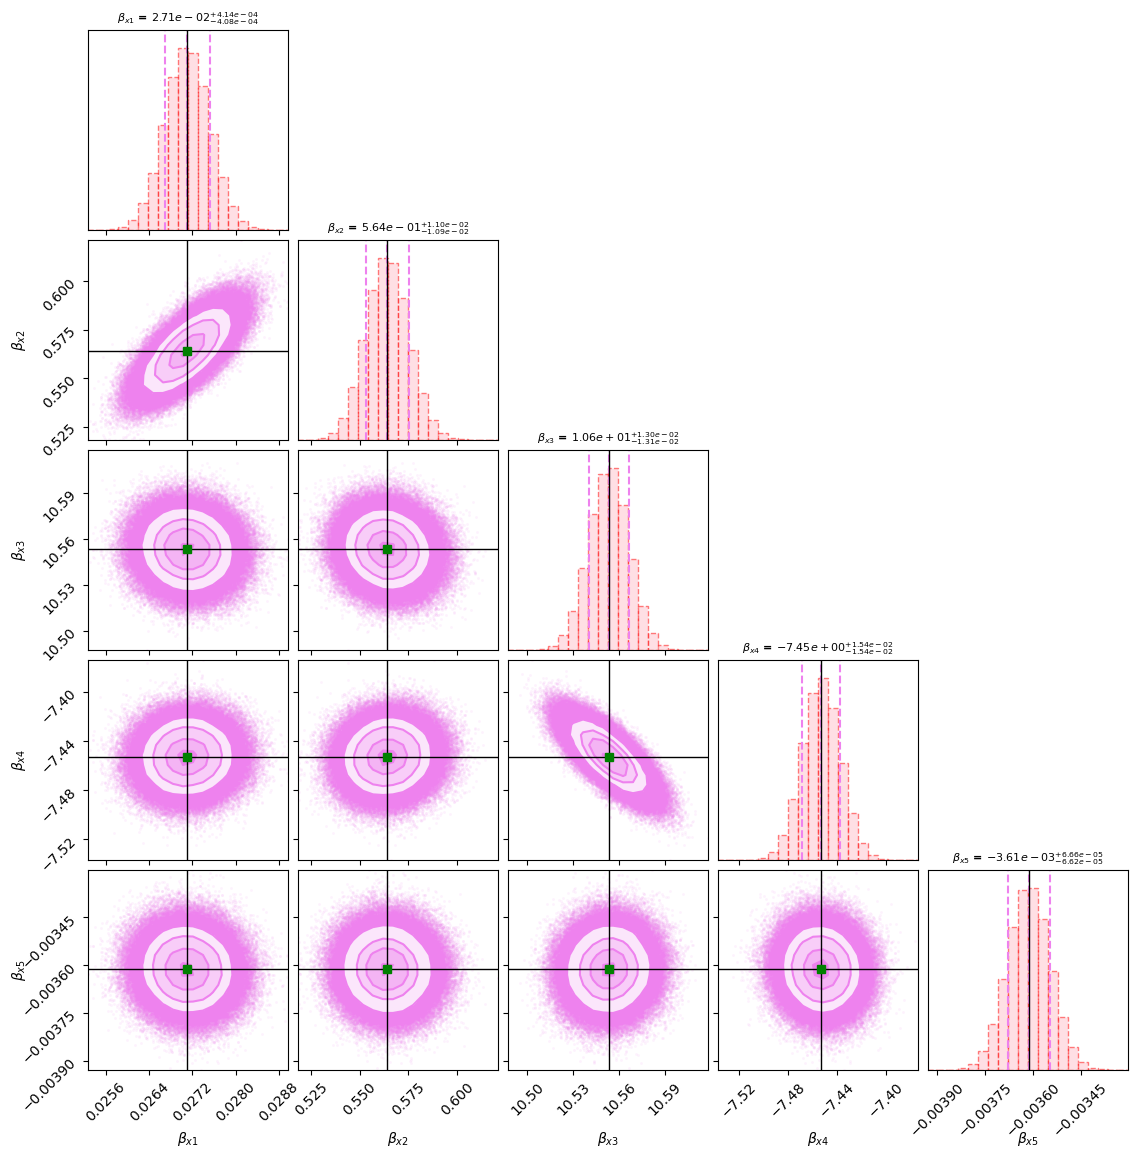

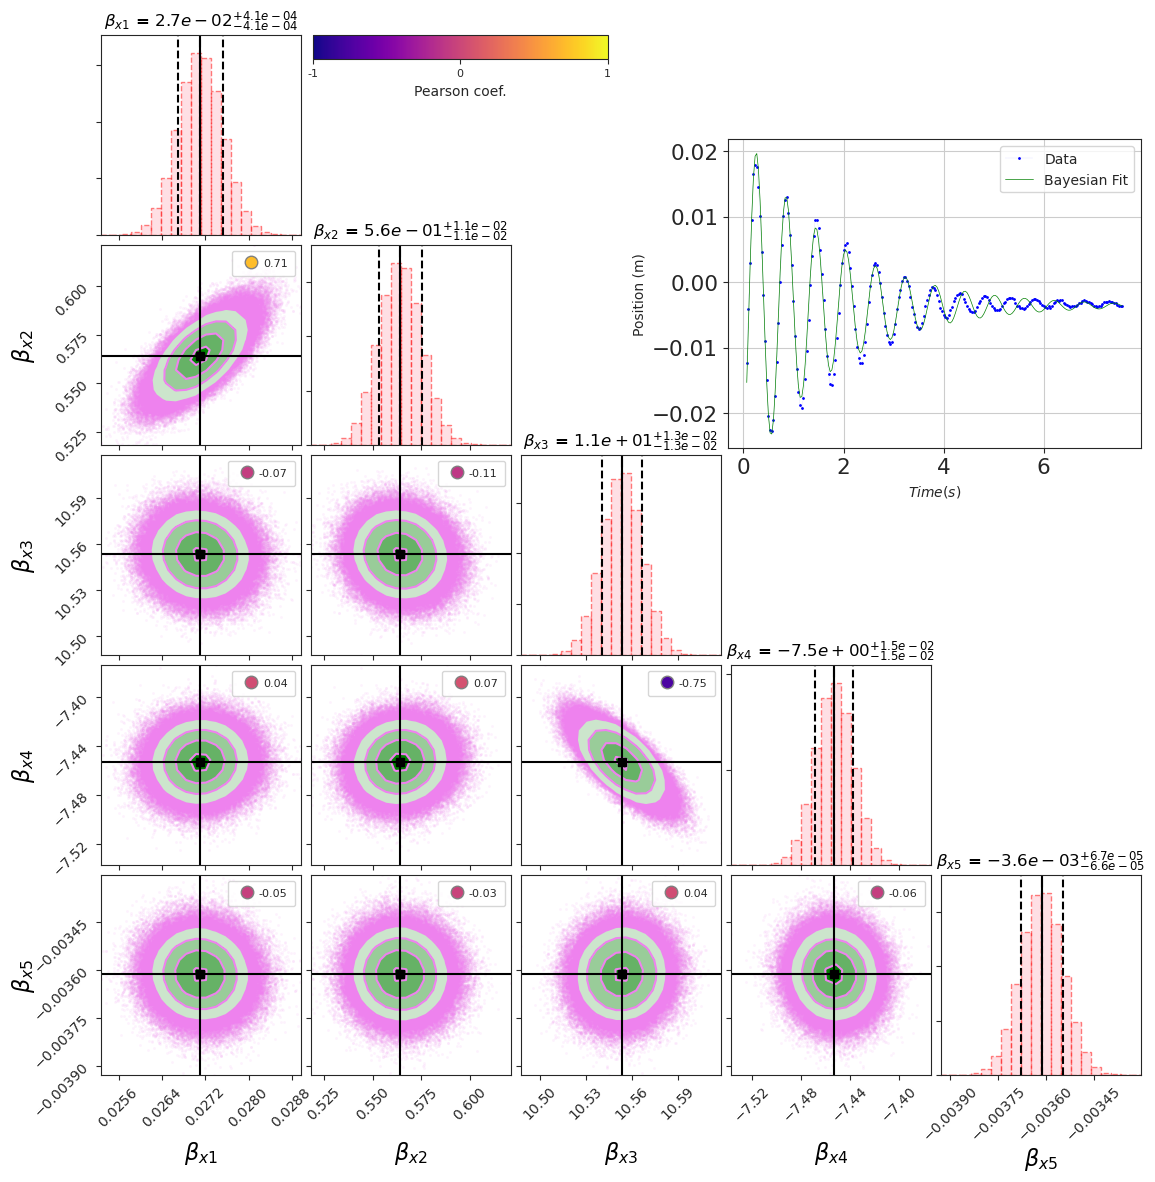

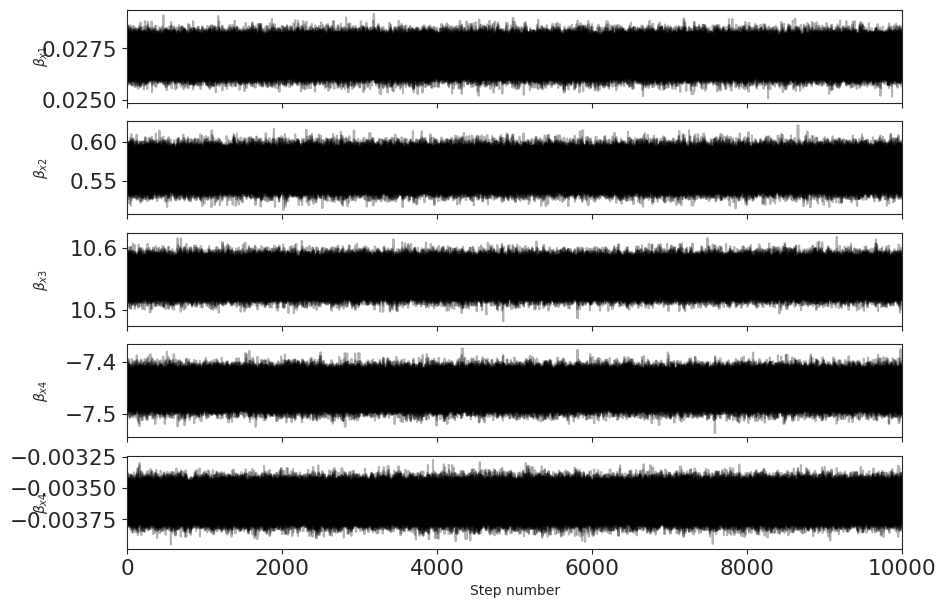

'\n##########\n##########\n##########\n##########\n##########\n##########\n##########\n##########\n##########\n##########\n##########\n##########\n\n# Ejecutar MCMC con más iteraciones (incluyendo calentamiento)\nn_steps_total = 15000\nsampler.run_mcmc(pos, n_steps_total, progress=True)\n\n# Obtener las cadenas de muestras generadas por el muestreo, incluyendo el calentamiento\nsamples_with_burnin = sampler.get_chain(discard=5000, thin=15, flat=True)\n\n\n# Graficar los trace plots para cada parámetro con el calentamiento incluido\nplt.figure(figsize=(10, 6))\nfor i in range(ndim):\n    plt.subplot(ndim, 1, i + 1)\n    plt.plot(sampler.get_chain()[:, :, i], "k", alpha=0.3)\n    plt.ylabel(f"Parámetro {i + 1}")\nplt.xlabel("Número de iteración")\nplt.tight_layout()\nplt.show()\n\n# Obtener las distribuciones marginales con el calentamiento incluido\nlabels = ["A", "B", "C", "D", "E"]\ncorner_kwargs = {"labels": labels, "quantiles": [0.16, 0.5, 0.84]}\n\nfig, axes = plt.subplots(ndim, nd

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import emcee


ruta_archivo = 'U1.txt'
data = np.loadtxt(ruta_archivo)

def model(x, a, b, c, d, e):
    return a * np.exp(-b * x) * np.sin(c * x + d) + e

def log_prior(params):
    a, b, c, d, e = params
    # Definir las priors para cada parámetro
    # Por ejemplo, prior uniforme para a, b, c, d, e en ciertos rangos:
    if 0.01 < a < 1 and 0.01 < b < 11 and 5 < c < 15 and -10 < d < -5 and -1 < e < -0.001:
        return 0.0
    return -np.inf

def log_probability(params, x, y, yerr):
    prior = log_prior(params)
    if not np.isfinite(prior):
        return -np.inf

    y_model = model(x, *params)
    chi_squared = np.sum(((y - y_model) / yerr) ** 2)
    log_likelihood = -0.5 * chi_squared

    return prior + log_likelihood



# Datos observados
xdata = data[:, 0]
ydata = data[:, 1]
yerr = 0.001


# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los datos con barras de error (opcional)
ax.errorbar(xdata, ydata, yerr=yerr, fmt='o', label='Datos observados', capsize=3)

# Agregar etiquetas a los ejes y un título
ax.set_xlabel('xdata')
ax.set_ylabel('ydata')
ax.set_title('Gráfico de datos')

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico
plt.show()




# Valores iniciales para los parámetros del modelo
initial_guess = [0.02, 0.5, 10.0, -7.0, -0.003]


# Número de caminantes y dimensiones
nwalkers = 700
ndim = len(initial_guess)

# Genera una muestra inicial aleatoria de parámetros
pos = initial_guess + 1e-4 * np.random.randn(nwalkers, ndim)

# Crea el objeto sampler
#sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(xdata, ydata, yerr))
#sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(xdata, ydata, yerr), moves=[(emcee.moves.DEMove(), 0.5), (emcee.moves.DESnookerMove(), 0.5)])
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability,args=(xdata, ydata, yerr), moves=emcee.moves.StretchMove(a=0.1))

# Ejecutar MCMC para el calentamiento
n_burnin_steps = 500
pos, _, _ = sampler.run_mcmc(pos, n_burnin_steps)

# Reiniciar las cadenas para la fase de muestreo posterior al calentamiento
sampler.reset()

# Ejecuta el muestreo MCMC
n_steps = 10000
sampler.run_mcmc(pos, n_steps, progress=True)



# Obtén las cadenas de muestras generadas por el muestreo
samples = sampler.get_chain()

# Obtén las muestras planas
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
#print(flat_samples)



# Muestra los valores de los parámetros ajustados
parametros_ajustados = []
for i in range(ndim):
    mcmc_result = np.percentile(flat_samples[:, i], [16, 50, 84])
    parametros_ajustados.append(mcmc_result[1])
    print(f"Parámetro {i+1}: {mcmc_result[1]:.2e} +{mcmc_result[2]-mcmc_result[1]:.2e} -{mcmc_result[1]-mcmc_result[0]:.2e}")

print(parametros_ajustados)    
pu = parametros_ajustados[0]
pd = parametros_ajustados[1] 
pt = parametros_ajustados[2] 
pc = parametros_ajustados[3]
pci = parametros_ajustados[4]

with open('parametrosx.txt', 'w') as file:
    file.write(f'pu = {pu}\n')
    file.write(f'pd = {pd}\n')
    file.write(f'pt = {pt}\n')
    file.write(f'pc = {pc}\n')
    file.write(f'pci = {pci}\n')

print("Los valores han sido guardados en el archivo 'parametrosx.txt'.")


Pu = +2.71001900e-02  
Pd = +5.63642290e-01  
Pt = +1.05532234e+01 
Pc = -7.45290879e+00
Pci = -3.61251530e-03
yteo=pu*np.exp(-pd*xdata)*np.sin(pt*xdata + pc) + pci
yteo2=Pu * np.exp(-Pd * xdata) * np.sin(Pt * xdata + Pc) + Pci

# ajustamos los datos tanto de posición como de velocidad
plt.plot(xdata, ydata, color='blue', label='Data',marker='.',markersize=2.0,linewidth=0.05,ls='--')
plt.plot(xdata, yteo, color='green',linewidth=0.5, label='Bayesian Fit')
plt.xlabel(r'$Time (s)$')
plt.ylabel(r'Position(m)')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()   
    
    
# Visualiza los resultados utilizando el diagrama de esquina
import corner

labels = [r'$\beta_{x1}$', r'$\beta_{x2}$', r'$\beta_{x3}$', r'$\beta_{x4}$',r'$\beta_{x5}$']
fig = corner.corner(flat_samples, labels=labels, quantiles=[0.16, 0.5, 0.84],
    color="violet",
    show_titles=True,
    plot_density=True,
    plot_contours=True, 
    fill_contours=True,
    group="posterior",
    hist_kwargs={"color": "pink","edgecolor": "red","linestyle":"dashed", "linewidth": 1,"alpha": 0.5,"histtype":"barstacked"},
    title_kwargs={"fontsize": 8,"color": "Black", "fontweight": "bold"},title_fmt='.2e')
Medianas = np.array(parametros_ajustados)
print(Medianas)
corner.overplot_lines(fig, Medianas, color="Black",linewidth=1.0)   
corner.overplot_points(fig, Medianas[None], marker="s", color="green")

plt.show()




############################################################################################
############################################################################################
############
############
############COEFIENTE DE CORRELACION EN CORNER PLOT
lista_medianas = Medianas.tolist()
import corner.cornerHDR as HDR
labels = [r'$\beta_{x1}$', r'$\beta_{x2}$', r'$\beta_{x3}$', r'$\beta_{x4}$',r'$\beta_{x5}$']
label_kwargs = {"fontsize": 16, "color": "black", "fontweight": "bold"}
fig = HDR.corner(flat_samples, labels=labels, quantiles=[0.16, 0.5, 0.84],
    color="black",
    show_titles=True,
    add_pvalue=True,
    plot_density=True,
    plot_contours=True,
    smooth=1.0,
    max_n_ticks=5,
    use_math_text=True,
    fill_contours=True,
    truths= lista_medianas,
    truth_color="black",
    title_fmt='.1e',
    color_hist="violet",color_dens="green",
    group="posterior",
    label_kwargs=label_kwargs,
    hist_kwargs={"color": "pink","edgecolor": "red","linestyle":"dashed", "linewidth": 1,"alpha": 0.5,"histtype":"barstacked"},
    title_kwargs={"fontsize": 12,"color": "Black", "fontweight": "bold"})
# Crear la figura y el subplot para el gráfico de plt.plot
#(10, 10): Este es el tamaño de la cuadrícula
#(1, 6): Esta es la posición en la cuadrícula donde deseas que comience el subplot 
#que estás creando. Los índices son basados en cero, por lo que (1, 6) corresponde a 
#la fila 2 (índice 1) y la columna 7 (índice 6) de la cuadrícula.
ax = plt.subplot2grid((10, 10), (1, 6), rowspan=3, colspan=4) # Subplot en una disposición de 3 filas y 3 columnas, seleccionando el tercer subplot
# Código para generar el gráfico de plt.plot
ax.plot(xdata, ydata, color='blue', label='Data', marker='.', markersize=2.0, linewidth=0.05, ls='--')
ax.plot(xdata, yteo, color='green', linewidth=0.5, label='Bayesian Fit')
ax.set_xlabel(r'$Time (s)$')
ax.set_ylabel(r'Position (m)')
ax.legend()
ax.grid(True)

plt.savefig("Position.png",dpi=600)
plt.show()

# Diagnóstico de convergencia: Trace plot
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
labels = [r'$\beta_{x1}$', r'$\beta_{x2}$', r'$\beta_{x3}$', r'$\beta_{x4}$',r'$\beta_{x4}$']
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
axes[-1].set_xlabel("Step number")

plt.savefig("ConvergencePosition.png",dpi=600)
plt.show()


"""
# Diagnóstico de convergencia: Gelman-Rubin (R-hat)
tau = sampler.get_autocorr_time()
R_hat = np.max(tau) / np.mean(tau)
print(f"Gelman-Rubin (R-hat) statistics for each parameter: {R_hat}")





##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########

# Crear objetos sampler con diferentes movimientos de muestreo
sampler_demove = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(xdata, ydata, yerr), moves=[(emcee.moves.DEMove(), 0.5)])
sampler_desnookermove = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(xdata, ydata, yerr), moves=[(emcee.moves.DESnookerMove(), 0.5)])

# Ejecutar MCMC con diferentes movimientos
n_steps = 10000
sampler_demove.run_mcmc(pos, n_steps, progress=True)
sampler_desnookermove.run_mcmc(pos, n_steps, progress=True)

# Obtener las cadenas de muestras generadas por el muestreo para cada método
samples_demove = sampler_demove.get_chain(discard=100, thin=15, flat=True)
samples_desnookermove = sampler_desnookermove.get_chain(discard=100, thin=15, flat=True)

# Graficar los trace plots para cada parámetro con diferentes movimientos
plt.figure(figsize=(10, 6))
for i in range(ndim):
    plt.subplot(ndim, 1, i + 1)
    plt.plot(samples_demove[:, i], "k", alpha=0.3)
    plt.plot(samples_desnookermove[:, i], "b", alpha=0.3)
    plt.ylabel(f"Parámetro {i + 1}")
plt.xlabel("Número de iteración")
plt.tight_layout()
plt.show()

# Obtener las distribuciones marginales para cada parámetro con diferentes movimientos
labels = ["A", "B", "C", "D", "E"]
corner_kwargs = {"labels": labels, "quantiles": [0.16, 0.5, 0.84]}

fig, axes = plt.subplots(ndim, ndim, figsize=(10, 10))
corner.corner(samples_demove, fig=fig, bins=30, color="k", **corner_kwargs)
corner.corner(samples_desnookermove, fig=fig, bins=30, color="b", **corner_kwargs)
plt.show()



##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########


# Generar diferentes puntos iniciales
n_chains = 5
starting_positions = [pos + 1e-4 * np.random.randn(nwalkers, ndim) for _ in range(n_chains)]

# Crear objetos sampler para cada cadena
sampler_list = [emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(xdata, ydata, yerr)) for _ in range(n_chains)]

# Ejecutar MCMC para cada cadena desde diferentes puntos iniciales
for i in range(n_chains):
    sampler_list[i].run_mcmc(starting_positions[i], n_steps, progress=True)

# Obtener las cadenas de muestras generadas por el muestreo para cada cadena
samples_list = [sampler_list[i].get_chain(discard=100, thin=15, flat=True) for i in range(n_chains)]

# Graficar los trace plots para cada parámetro y cada cadena
plt.figure(figsize=(10, 8))
for i in range(n_chains):
    for j in range(ndim):
        plt.subplot(n_chains, ndim, i * ndim + j + 1)
        plt.plot(sampler_list[i].get_chain()[:, :, j], "k", alpha=0.3)
        plt.ylabel(f"Cadena {i + 1}\nParámetro {j + 1}")
plt.xlabel("Número de iteración")
plt.tight_layout()
plt.show()

# Obtener las distribuciones marginales para cada parámetro y cada cadena
labels = ["A", "B", "C", "D", "E"]
corner_kwargs = {"labels": labels, "quantiles": [0.16, 0.5, 0.84]}

fig, axes = plt.subplots(ndim, ndim, figsize=(10, 10))
for i in range(n_chains):
    corner.corner(samples_list[i], fig=fig, bins=30, color="k", **corner_kwargs)
plt.show()
"""
"""
import emcee.autocorr as ac

# Calcular el estadístico Gelman-Rubin para cada parámetro

gelman_rubin_stats = np.array([emcee.autocorr.gelman_rubin(chain) for chain in samples_list])

print("Estadístico Gelman-Rubin para cada parámetro:")
print(gelman_rubin_stats)
"""
"""
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########
##########

# Ejecutar MCMC con más iteraciones (incluyendo calentamiento)
n_steps_total = 15000
sampler.run_mcmc(pos, n_steps_total, progress=True)

# Obtener las cadenas de muestras generadas por el muestreo, incluyendo el calentamiento
samples_with_burnin = sampler.get_chain(discard=5000, thin=15, flat=True)


# Graficar los trace plots para cada parámetro con el calentamiento incluido
plt.figure(figsize=(10, 6))
for i in range(ndim):
    plt.subplot(ndim, 1, i + 1)
    plt.plot(sampler.get_chain()[:, :, i], "k", alpha=0.3)
    plt.ylabel(f"Parámetro {i + 1}")
plt.xlabel("Número de iteración")
plt.tight_layout()
plt.show()

# Obtener las distribuciones marginales con el calentamiento incluido
labels = ["A", "B", "C", "D", "E"]
corner_kwargs = {"labels": labels, "quantiles": [0.16, 0.5, 0.84]}

fig, axes = plt.subplots(ndim, ndim, figsize=(10, 10))
corner.corner(samples_with_burnin, fig=fig, bins=30, color="k", **corner_kwargs)
plt.show()

# Realizar análisis con las muestras que incluyen el calentamiento
# Puedes realizar cualquier análisis que desees con las muestras obtenidas.
# Por ejemplo, calcular las estimaciones de los parámetros, intervalos de confianza, etc.
# Estimación de parámetros y errores (usando cuantiles de las muestras)
parameters = np.median(samples_with_burnin, axis=0)
errors_lower, errors_upper = np.percentile(samples_with_burnin, [16, 84], axis=0)
errors = 0.5 * (errors_upper - errors_lower)

print("Estimaciones de los parámetros:")
print(parameters)
print("Errores de los parámetros:")
print(errors)ruta_archivo = 'U1.txt'
data = np.loadtxt(ruta_archivo)




xdata = data[:, 1]
ydata = data[:, 2]
yerr = 0.001



# Graficar los datos con barras de error (opcional)
plt.plot(xdata, ydata, color='blue', label='Data',marker='.',markersize=2.0,linewidth=0.05,ls='--')
plt.xlabel(r'$Position (m)$')
plt.ylabel(r'Velocity(m/s)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()   


# Determinar el cuadrante de cada punto
quadrant = np.zeros(len(xdata), dtype=int)

for i in range(len(xdata)):
    if xdata[i] >= 0 and ydata[i] >= 0:
        quadrant[i] = 1
    elif xdata[i] < 0 and ydata[i] >= 0:
        quadrant[i] = 2
    elif xdata[i] < 0 and ydata[i] < 0:
        quadrant[i] = 3
    elif xdata[i] >= 0 and ydata[i] < 0:
        quadrant[i] = 4

# Gráfico
plt.scatter(xdata[quadrant == 1], ydata[quadrant == 1], color='blue', label='First Quadrant')
plt.scatter(xdata[quadrant == 2], ydata[quadrant == 2], color='green', label='Second Quadrant')
plt.scatter(xdata[quadrant == 3], ydata[quadrant == 3], color='red', label='Third Quadrant')
plt.scatter(xdata[quadrant == 4], ydata[quadrant == 4], color='purple', label='Four Cuadrant')
plt.legend()
plt.xlabel(r'$Position (m)$')
plt.ylabel(r'Velocity(m/s)')
plt.title('Quadrants of the points')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


rdata = np.sqrt(xdata**2 + ydata**2)
thetadata = np.arctan2(ydata, xdata)

for i in range(len(xdata)):
    print(f"Punto ({xdata[i]}, {ydata[i]}) -> Coordenadas polares (r={rdata[i]}, θ={thetadata[i]})")
    


import seaborn as sns

# Gráfico de densidad para cada parámetro
sns.kdeplot(samples_with_burnin[:, 0], label="Parámetro A")
sns.kdeplot(samples_with_burnin[:, 1], label="Parámetro B")
sns.kdeplot(samples_with_burnin[:, 2], label="Parámetro C")
sns.kdeplot(samples_with_burnin[:, 3], label="Parámetro D")
sns.kdeplot(samples_with_burnin[:, 4], label="Parámetro E")
plt.xlabel("Valor del parámetro")
plt.ylabel("Densidad")
plt.legend()
plt.show()

# Intervalos de confianza al 68% para cada parámetro
confidence_intervals = np.percentile(samples_with_burnin, [16, 84], axis=0)

print("Intervalos de confianza al 68% para cada parámetro:")
for i, label in enumerate(labels):
    print(f"{label}: {confidence_intervals[0, i]:.4f} - {confidence_intervals[1, i]:.4f}")
# Estimación de parámetros y errores (usando cuantiles de las muestras)
parameters = np.median(samples_with_burnin, axis=0)
errors_lower, errors_upper = np.percentile(samples_with_burnin, [16, 84], axis=0)
errors = 0.5 * (errors_upper - errors_lower)

print("Estimaciones de los parámetros:")
print(parameters)
print("Errores de los parámetros:")
print(errors)
"""



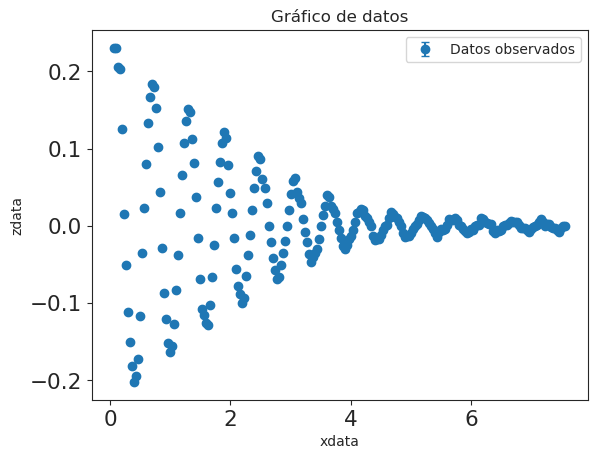

100%|█████████████████████████████████████| 10000/10000 [06:03<00:00, 27.52it/s]


Parámetro 1: 2.54e-02 +3.49e-05 -3.47e-05
Parámetro 2: 5.42e-01 +9.92e-04 -9.89e-04
Parámetro 3: 1.06e+01 +1.35e-03 -1.35e-03
Parámetro 4: -1.22e+00 +1.71e-03 -1.71e-03
[0.025421861139062512, 0.5423803810636396, 10.582499869786059, -1.2153510695472272]
Los valores han sido guardados en el archivo 'parametrosv.txt'.


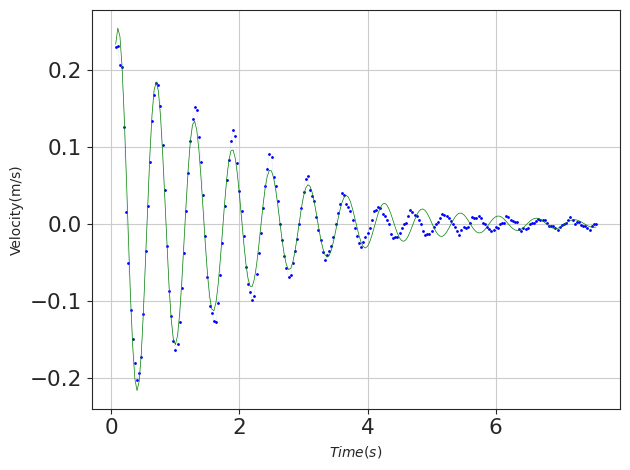

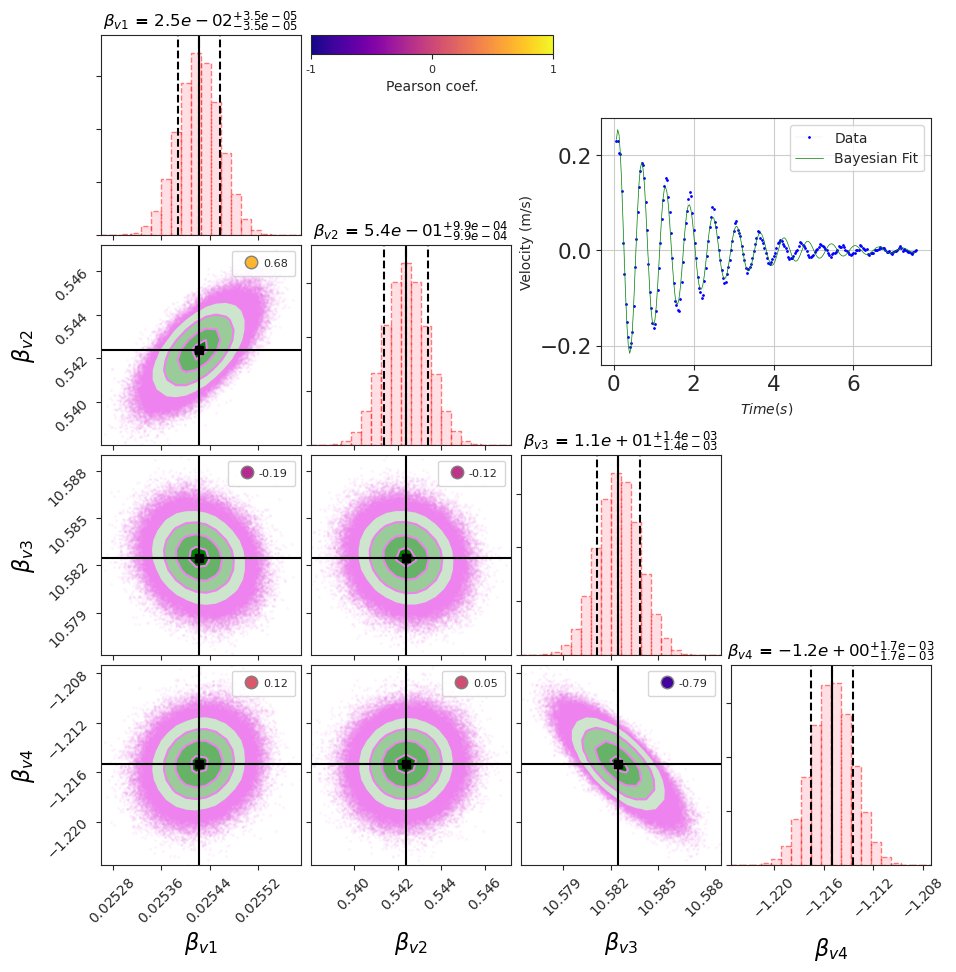

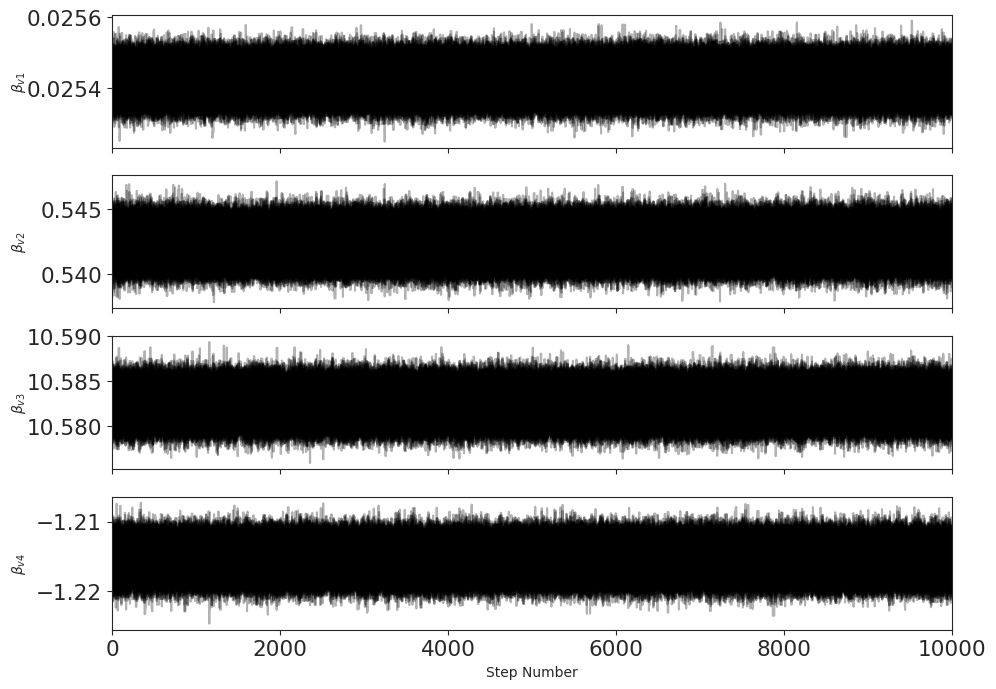

In [2]:
# Definimos la funcion VELOCIDAD

ruta_archivo = 'U1.txt'
data = np.loadtxt(ruta_archivo)



def vel(x, k, l, m, n):
    return k* np.exp(-l*x) *(m*np.cos(m * x + n)-l * np.sin(m * x + n))

def log_prior(params):
    k, l, m, n = params
    # Definir las priors para cada parámetro
    # Por ejemplo, prior uniforme para a, b, c, d, e en ciertos rangos:
    if 0.01 < k < 1 and 0.01 < l < 1 and 5 < m < 15 and -2 < n < -1:
        return 0.0
    return -np.inf

def log_probability(params, x, y, yerr):
    prior = log_prior(params)
    if not np.isfinite(prior):
        return -np.inf

    y_model = vel(x, *params)
    chi_squared = np.sum(((y - y_model) / yerr) ** 2)
    log_likelihood = -0.5 * chi_squared

    return prior + log_likelihood



# Datos observados
xdata = data[:, 0]
ydata = data[:, 2]
yerr = 0.001


# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los datos con barras de error (opcional)
ax.errorbar(xdata, ydata, yerr=yerr, fmt='o', label='Datos observados', capsize=3)

# Agregar etiquetas a los ejes y un título
ax.set_xlabel('xdata')
ax.set_ylabel('zdata')
ax.set_title('Gráfico de datos')

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico
plt.show()




# Valores iniciales para los parámetros del modelo
initial_guess = [ 0.03 ,0.55,10.58,-1.22]


# Número de caminantes y dimensiones
nwalkers = 700
ndim = len(initial_guess)

# Genera una muestra inicial aleatoria de parámetros
pos = initial_guess + 1e-4 * np.random.randn(nwalkers, ndim)

# Crea el objeto sampler
#sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(xdata, ydata, yerr))
#sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(xdata, ydata, yerr), moves=[(emcee.moves.DEMove(), 0.5), (emcee.moves.DESnookerMove(), 0.5)])
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability,args=(xdata, ydata, yerr), moves=emcee.moves.StretchMove(a=0.1))

# Ejecutar MCMC para el calentamiento
n_burnin_steps = 500
pos, _, _ = sampler.run_mcmc(pos, n_burnin_steps)

# Reiniciar las cadenas para la fase de muestreo posterior al calentamiento
sampler.reset()

# Ejecuta el muestreo MCMC
n_steps = 10000
sampler.run_mcmc(pos, n_steps, progress=True)



# Obtén las cadenas de muestras generadas por el muestreo
samples = sampler.get_chain()

# Obtén las muestras planas
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
#print(flat_samples)



# Muestra los valores de los parámetros ajustados
parametros_ajustados = []
for i in range(ndim):
    mcmc_result = np.percentile(flat_samples[:, i], [16, 50, 84])
    parametros_ajustados.append(mcmc_result[1])
    print(f"Parámetro {i+1}: {mcmc_result[1]:.2e} +{mcmc_result[2]-mcmc_result[1]:.2e} -{mcmc_result[1]-mcmc_result[0]:.2e}")

print(parametros_ajustados)    
K = parametros_ajustados[0]
L = parametros_ajustados[1] 
M = parametros_ajustados[2] 
N = parametros_ajustados[3]

with open('parametrosv.txt', 'w') as file:
    file.write(f'K = {K}\n')
    file.write(f'L = {L}\n')
    file.write(f'M = {M}\n')
    file.write(f'N = {N}\n')

print("Los valores han sido guardados en el archivo 'parametrosv.txt'.")

Kk = +2.71001900e-02  
Ll = +5.63642290e-01  
Mm = +1.05532234e+01 
Nn = -7.45290879e+00
yteo=K* np.exp(-L*xdata) *(M*np.cos(M * xdata + N)-L * np.sin(M * xdata + N))
yteo2=Kk* np.exp(-Ll*xdata) *(Mm*np.cos(Mm * xdata + Nn)-Ll * np.sin(Mm * xdata + Nn))

# ajustamos los datos tanto de posición como de velocidad
plt.plot(xdata, ydata, color='blue', label='Datos',marker='.',markersize=2.0,linewidth=0.05,ls='--')
plt.plot(xdata, yteo, color='green',linewidth=0.5, label='AjusteEmcee')
plt.xlabel(r'$Time (s)$')
plt.ylabel(r'Velocity(m/s)')
plt.grid(True)
plt.tight_layout()
plt.show()   

Medianas = np.array(parametros_ajustados)


    
# Visualiza los resultados utilizando el diagrama de esquina
lista_medianas = Medianas.tolist()
import corner.cornerHDR as HDR
labels = [r'$\beta_{v1}$', r'$\beta_{v2}$', r'$\beta_{v3}$', r'$\beta_{v4}$']
label_kwargs = {"fontsize": 16, "color": "black", "fontweight": "bold"}
fig = HDR.corner(flat_samples, labels=labels, quantiles=[0.16, 0.5, 0.84],
    color="black",
    show_titles=True,
    add_pvalue=True,
    plot_density=True,
    plot_contours=True,
    smooth=1.0,
    max_n_ticks=5,
    use_math_text=True,
    fill_contours=True,
    truths= lista_medianas,
    truth_color="black",
    title_fmt='.1e',
    color_hist="violet",color_dens="green",
    group="posterior",
    label_kwargs=label_kwargs,
    hist_kwargs={"color": "pink","edgecolor": "red","linestyle":"dashed", "linewidth": 1,"alpha": 0.5,"histtype":"barstacked"},
    title_kwargs={"fontsize": 12,"color": "Black", "fontweight": "bold"})


# Crear la figura y el subplot para el gráfico de plt.plot
#(10, 10): Este es el tamaño de la cuadrícula
#(1, 6): Esta es la posición en la cuadrícula donde deseas que comience el subplot 
#que estás creando. Los índices son basados en cero, por lo que (1, 6) corresponde a 
#la fila 2 (índice 1) y la columna 7 (índice 6) de la cuadrícula.
ax = plt.subplot2grid((10, 10), (1, 6), rowspan=3, colspan=4) # Subplot en una disposición de 3 filas y 3 columnas, seleccionando el tercer subplot
# Código para generar el gráfico de plt.plot
ax.plot(xdata, ydata, color='blue', label='Data', marker='.', markersize=2.0, linewidth=0.05, ls='--')
ax.plot(xdata, yteo, color='green', linewidth=0.5, label='Bayesian Fit')
ax.set_xlabel(r'$Time (s)$')
ax.set_ylabel(r'Velocity (m/s)')
ax.legend()
ax.grid(True)
plt.savefig("Velocity.png",dpi=600)
plt.show()


# Diagnóstico de convergencia: Trace plot
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
labels = [r'$\beta_{v1}$', r'$\beta_{v2}$', r'$\beta_{v3}$', r'$\beta_{v4}$']
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
axes[-1].set_xlabel("Step Number")
plt.savefig("ConvergenceVelocity.png",dpi=600)
plt.tight_layout()
plt.show()